In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
from sklearn.model_selection import train_test_split
from skimage.transform import rescale, resize, downscale_local_mean

In [14]:
fashion = pd.read_csv('fashion-mnist_train.csv') # Import dataset
fashion

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y = fashion['label'].values # Extract the Y-values.

In [16]:
X = fashion.drop(columns=['label']).values / 255 # Drop the Y-values and scale the X-values.

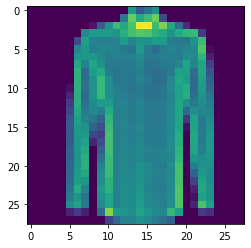

In [17]:
plt.imshow(np.reshape(X[62],(28,28)))

In [18]:
def softmax(x): # Softmax
    return np.exp(x) / np.sum(np.exp(x))

def score(a, b): # Scoring function
    return a @ b

def CELoss(X, Y, w): # Cross-entropy loss
    L = 0 # Define loss
    for i in range(X.shape[0]): # Iterate through X
        soft = softmax(score(w, X[i])) # Softmax
        L -= np.vdot(Y[i],np.log(soft)) # Cross Entropy Loss
    return L

def sgd(a, b): # Stochastic gradient descent
    return np.outer(a, b)
        

def main(X,Y,learning_rate):
    row = X.shape[0] # Initialize the row for "stochastic"
    iteration = 64 # Number of epochs
    X = np.insert(X,0,1,axis=1) # Add constant vector
    
    w = np.zeros((Y.shape[1], X.shape[1])) # Initialize the weight vectors
    loss = [] # Setup loss values list
    
    for ep in range(iteration):
        
        Loss = CELoss(X, Y, w) # Compute the loss value
        print('Loss is: ' + str(Loss)) # Print the loss for visualization
        loss.append(Loss) # Append loss to the loss values list
        
        prm = np.random.permutation(row) # Initialize the "stochastic"
        for i in prm:            
            soft = softmax(score(w, X[i])) # Softmax
            gradient = sgd(soft - Y[i], X[i]) # Stochastic gradient descent
            w = w - learning_rate * gradient # Update weight value
            
    return w, loss # Return the optimized weights and the loss values for visualization

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
y_train = pd.get_dummies(y_train).values

In [21]:
w, loss = main(X_train, y_train, 0.001)

Loss is: 110524.08446378271
Loss is: 26164.11573801685
Loss is: 23480.482734951078
Loss is: 22834.70328324627
Loss is: 22184.139016338457
Loss is: 21532.909167770973
Loss is: 21106.564171837246
Loss is: 20710.18455068895
Loss is: 20843.486895125967
Loss is: 20253.985625852496
Loss is: 20551.482734209334
Loss is: 20210.9858727907
Loss is: 19777.3657825854
Loss is: 19878.543022866146
Loss is: 19792.53986654515
Loss is: 19817.583658314463
Loss is: 20128.12812117623
Loss is: 19185.52945457689
Loss is: 19530.181529850204
Loss is: 19249.20258362955
Loss is: 19151.069698531803
Loss is: 19447.293864227024
Loss is: 19328.994629430515
Loss is: 18841.523040070977
Loss is: 19317.517342669762
Loss is: 19061.676942222894
Loss is: 19012.51913381312
Loss is: 18680.326368953884
Loss is: 18583.955448094363
Loss is: 18700.554277818435
Loss is: 19121.758998086443
Loss is: 18540.266855404003
Loss is: 19121.088909854174
Loss is: 18870.81821064886
Loss is: 18389.150943214318
Loss is: 18377.243568690465
Loss 

Text(0, 0.5, 'Loss value')

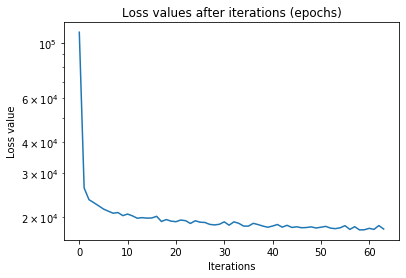

In [22]:
plt.semilogy(loss)
plt.title('Loss values after iterations (epochs)')
plt.xlabel('Iterations')
plt.ylabel('Loss value')

In [23]:
X_test = np.insert(X_test, 0, 1, axis=1) # Add constant vector
predictions = [] # Define a prediction list
for x in range(X_test.shape[0]):
    soft = softmax(score(w, X_test[x])) # Softmax
    prob = np.argmax(soft) # Find the index with maximum probability
    predictions.append(prob) # Add the final prediction to the list
    
accuracy = np.count_nonzero(pd.Series(predictions) == pd.Series(y_test)) / len(predictions) # Count our correctness
print("Our test accuracy is", accuracy)

Our test accuracy is 0.8541666666666666


In [24]:
print("Our test accuracy is", accuracy)

Our test accuracy is 0.8541666666666666
